In [ ]:
# Imports
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import string
from nltk.stem.porter import * # PorterStemmer
from sklearn import linear_model

## Loading the Dataset

In [ ]:
# Function to load dataset
def load_data(file_name, head = 100000):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)

            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return data

In [ ]:
DIR = "/Users/milliehuang/Documents/dsc/dsu/goodreads"

Loading the book reviews dataset

In [ ]:
book_reviews = load_data(os.path.join(DIR, 'goodreads_reviews_spoiler_raw.json.gz'))

In [ ]:
book_reviews = pd.DataFrame(book_reviews)

In [ ]:
print(' == sample record (poetry review) ==')
display(np.random.choice(book_reviews['review_text']))

 == sample record (poetry review) ==


'I freaking wanted to be done with this book. Thank God, I got through to the end.'

In [ ]:
book_reviews.describe()

,rating,n_votes,n_comments
count,100001.000000,100001.000000,100001.000000
mean,3.725493,2.853341,0.953640
std,1.234081,12.840693,4.834392
min,0.000000,-2.000000,-1.000000
25%,3.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000
max,5.000000,931.000000,564.000000


In [ ]:
book_reviews['book_id'] = book_reviews['book_id'].astype(int)

In [ ]:
book_reviews.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,,,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,,,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


Loading the Book Information Dataset

In [ ]:
# book_info = book_info[['isbn', 'language_code', 'average_rating', 'publication_year', 'url', 'image_url', 'book_id', 'ratings_count', 'title','title_without_series']]

In [ ]:
book_info1 = pd.read_csv('book1-100k.csv')

In [ ]:
book_info1.sort_values(by = "CountsOfReview", ascending = False).head()

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
25208,41865,"Twilight (Twilight, #1)",1:531054,501,4:1059392,total:4734773,6,9,"Little, Brown and Company",94850,2006,eng,Stephenie Meyer,3.59,2:520599,5:1662040,0316015849,3:961688
11401,19063,The Book Thief,1:24330,552,4:495431,total:1727186,14,3,Alfred A. Knopf,87685,2006,eng,Markus Zusak,4.37,2:45995,5:985221,0375831002,3:176209
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458
2320,3636,"The Giver (The Giver, #1)",1:32692,208,4:558893,total:1681531,24,1,Ember,57034,2006,eng,Lois Lowry,4.13,2:73091,5:739329,0385732554,3:277526
26215,43641,Water for Elephants,1:19553,335,4:494509,total:1327834,1,5,Algonquin Books,52918,2007,eng,Sara Gruen,4.09,2:57353,5:522497,1565125606,3:233922


In [ ]:
book_info1['Id'] = book_info1['Id'].astype(int)

In [ ]:
book_info1 = pd.concat([book_info1, pd.read_csv('book200k-300k.csv'),
                       pd.read_csv('book300k-400k.csv'),
                       pd.read_csv('book400k-500k.csv'),
                       pd.read_csv('book500k-600k.csv'),
                       pd.read_csv('book600k-700k.csv'),
                       pd.read_csv('book700k-800k.csv'),
                       pd.read_csv('book800k-900k.csv'),
                       pd.read_csv('book900k-1000k.csv'),
                    pd.read_csv('book1000k-1100k.csv'),
                    pd.read_csv('book1100k-1200k.csv'),
                    pd.read_csv('book1200k-1300k.csv'),
                    pd.read_csv('book1300k-1400k.csv'),
                    pd.read_csv('book1400k-1500k.csv'),
                    pd.read_csv('book1500k-1600k.csv'),
                    pd.read_csv('book1600k-1700k.csv'),
                    pd.read_csv('book1700k-1800k.csv'),
                    pd.read_csv('book1800k-1900k.csv'),
                    pd.read_csv('book1900k-2000k.csv'),
                    pd.read_csv('book2000k-3000k.csv'),
                    pd.read_csv('book3000k-4000k.csv')])

In [ ]:
# embedding_df = pd.merge(book_reviews, book_info, left_on = 'book_id', right_on = 'book_id', how = 'inner')

In [ ]:
# embedding_df.describe()

,book_id,rating,n_votes,n_comments
count,8.471700e+04,84717.000000,84717.000000,84717.000000
mean,1.335404e+07,3.722936,2.864679,0.962617
std,9.198530e+06,1.235133,12.788352,4.935201
min,1.000000e+00,0.000000,-2.000000,-1.000000
25%,6.308379e+06,3.000000,0.000000,0.000000
50%,1.353887e+07,4.000000,0.000000,0.000000
75%,1.920810e+07,5.000000,2.000000,0.000000
max,3.632868e+07,5.000000,931.000000,564.000000


In [ ]:
# embedding_df.sort_values(by = 'ratings_count', ascending = False)[['title_without_series', 'ratings_count', 'book_id']]

NOTE: Run instead pd.read_csv("book_info_reviews.csv")

In [ ]:
embedding_df = pd.read_csv('book_info_reviews.csv', low_memory = False)

In [ ]:
embedding_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
embedding_df.head()

,title_without_series,review_text,image_url,ratings_count,publication_year,book_id,embedding,embedding_avg,review_text_sentence
0,The Three-Body Problem (Remembrance of Earth’s...,special book started slow first third middle t...,https://images.gr-assets.com/books/1396560452m...,6336,2014.0,18245960,[],[],This is a special book. It started slow for ab...
1,The Three-Body Problem (Remembrance of Earth’s...,special book started slow first third middle t...,https://images.gr-assets.com/books/1396560452m...,6336,2014.0,18245960,[],[],Average between the 4 star concepts (overall p...
2,The Three-Body Problem (Remembrance of Earth’s...,special book started slow first third middle t...,https://images.gr-assets.com/books/1396560452m...,6336,2014.0,18245960,[],[],A really refreshing take on science fiction an...
3,The Three-Body Problem (Remembrance of Earth’s...,special book started slow first third middle t...,https://images.gr-assets.com/books/1396560452m...,6336,2014.0,18245960,[],[],"I'm really waffling between whether to rate ""d..."
4,Invisible Man,recommended katz avail free december httpwwwau...,https://images.gr-assets.com/books/1352854247m...,125232,1995.0,16981,[],[],Recommended by Don Katz. Avail for free in Dec...


In [ ]:
embedding_df.shape

(84717, 39)

## Cleaning the Data

Making the reviews lowercase:

In [ ]:
book_reviews['review_text'] = book_reviews['review_text'].str.lower()

Deleting the newline character /n:

In [ ]:
f = (lambda x: x if x != '\n' else '')
def delete_newline(sentence):
    words = sentence.split()
    result = [f(word) for word in words]
    return ' '.join(result)

In [ ]:
book_reviews['review_text'] = book_reviews['review_text'].apply(delete_newline)

Deleting the punctuation:

In [ ]:
punctuation = set(string.punctuation)

In [ ]:
g = (lambda x: x if x not in punctuation else '')
def delete_punctuation(sentence):
    words = sentence.split()
    result = []
    for word in words:
        new_word = [g(letter) for letter in word]
        result.append(''.join(new_word))
    return ' '.join(result)

In [ ]:
book_reviews['review_text'] = book_reviews['review_text'].apply(delete_punctuation)

In [ ]:
book_reviews.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,this is a special book it started slow for abo...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,recommended by don katz avail for free in dece...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,,,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,a fun fast paced science fiction thriller i re...,Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,,,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,i really enjoyed this book and there is a lot ...,Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


Stemming each word in the sentence:

In [ ]:
# stemmer = PorterStemmer()

# def stem_sentences(sentence):
#     tokens = sentence.split()
#     stemmed_tokens = [stemmer.stem(token) for token in tokens]
#     return ' '.join(stemmed_tokens)

In [ ]:
# poetry_reviews['review_text'].apply(stem_sentences)

Removing stopwords and lemmatizing words

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stopwords_list = stopwords.words('english')

def remove_stopwords(sentence):
    tokens = sentence.split()

    filtered_tokens = [token for token in tokens if token not in stopwords_list]

    return ' '.join(filtered_tokens)

def lemmatize_text(sentence):
    tokens = sentence.split()

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    processed_text = ' '.join(lemmatized_tokens)
    return processed_text


In [ ]:
book_reviews['review_text'] = book_reviews['review_text'].apply(remove_stopwords)

In [ ]:
book_reviews['review_text'] = book_reviews['review_text'].apply(lemmatize_text)

## Exploratory Data Analysis

### Word Counts

In [ ]:
word_count = defaultdict(int)
for d in book_reviews['review_text']:
    for w in d.split():
        word_count[w] += 1

len(word_count)

151781

In [ ]:
word_count = defaultdict(int)
punctuation = set(string.punctuation)
for d in book_reviews['review_text']:
    r = ''.join([c for c in d.lower() if not c in punctuation])
    for w in r.split():
        word_count[w] += 1

len(word_count)

151781

In [ ]:
word_count = defaultdict(int)
punctuation = set(string.punctuation)
stemmer = PorterStemmer()
for d in book_reviews['review_text']:
  r = ''.join([c for c in d.lower() if not c in punctuation])
  for w in r.split():
    w = stemmer.stem(w)
    word_count[w] += 1

len(word_count)

123706

In [ ]:
word_count = defaultdict(int)
punctuation = set(string.punctuation)
for d in book_reviews['review_text']:
  r = ''.join([c for c in d.lower() if not c in punctuation])
  for w in r.split():
    word_count[w] += 1

counts = [(word_count[w], w) for w in word_count]
counts.sort()
counts.reverse()

In [ ]:
words = [x[1] for x in counts[:1000]]
words[0:5]

['book', 'story', 'read', 'like', 'one']

In [ ]:
book_reviews.describe()

,book_id,rating,n_votes,n_comments
count,1.000010e+05,100001.000000,100001.000000,100001.000000
mean,1.339650e+07,3.725493,2.853341,0.953640
std,9.204343e+06,1.234081,12.840693,4.834392
min,1.000000e+00,0.000000,-2.000000,-1.000000
25%,6.339664e+06,3.000000,0.000000,0.000000
50%,1.354982e+07,4.000000,0.000000,0.000000
75%,1.935898e+07,5.000000,2.000000,0.000000
max,3.632868e+07,5.000000,931.000000,564.000000


Text(0.5, 9.444444444444438, 'Rating')

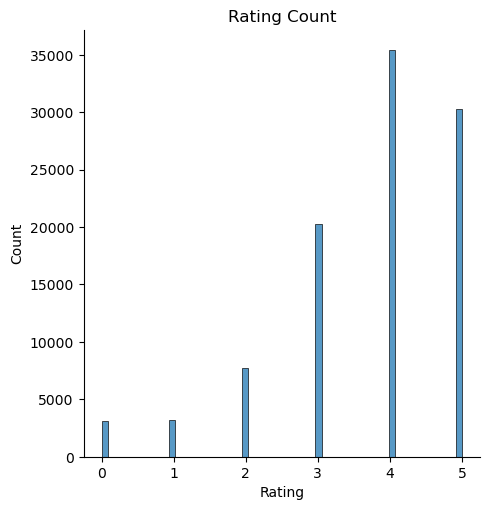

In [ ]:
sns.displot(book_reviews, x = 'rating')
plt.title('Rating Count')
plt.xlabel('Rating')

### Word Clouds

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
text = " ".join(review for review in book_reviews['review_text'])

In [ ]:
wordcloud = WordCloud(background_color = 'white').generate(text)

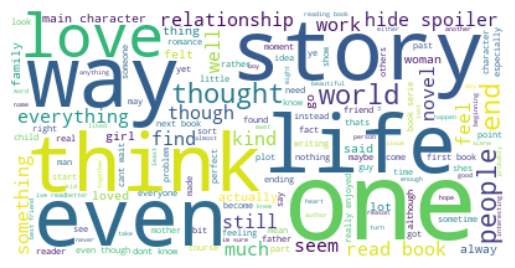

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Removing stopwords (words that bring essentially no meaning)

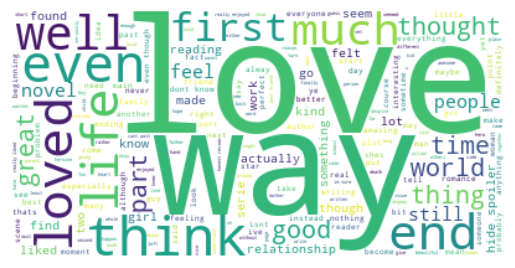

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["story", "read", "book", "one", "wa", "ha", "character"])
wordcloud2 = WordCloud(stopwords = stopwords, background_color = 'white').generate(text)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [ ]:
word_id = dict(zip(words, range(len(words))))
word_set = set(words)

In [ ]:
def feature(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum.lower() if not c in punctuation])
    for w in r.split():
        if w in words:
            feat[word_id[w]] += 1
    feat.append(1) # offset
    return feat

In [ ]:
X = [feature(d) for d in book_reviews['review_text']]
y = book_reviews['rating']

In [ ]:
# Regularized regression
clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
clf.fit(X, y)
theta = clf.coef_
predictions = clf.predict(X)

In [ ]:
pos_word = list(zip(theta[:-1], words))
pos_word.sort()
pos_word[-20:]

[(0.12891849183186493, 'fantastic'),
 (0.13130705567161882, 'surprised'),
 (0.13323316851839304, 'loved'),
 (0.13685895738330667, 'brilliant'),
 (0.14169588401313554, 'wonderful'),
 (0.14298179774423353, 'beautifully'),
 (0.14412483643286464, 'refreshing'),
 (0.14465033888814205, 'favorite'),
 (0.14515456040865599, 'awesome'),
 (0.14694189443553277, 'glad'),
 (0.1566126110633117, 'heartbreaking'),
 (0.15872576445790887, 'hooked'),
 (0.1753607625792974, 'amazing'),
 (0.18828122151566945, 'wait'),
 (0.20908244460483139, 'cried'),
 (0.2120945045336525, '5'),
 (0.2186135023988242, 'excellent'),
 (0.23377025292405065, 'wow'),
 (0.245063423413414, 'reread'),
 (0.28541351889286587, '45')]

In [ ]:
neg_word = list(zip(theta[:-1], words))
neg_word.sort()
neg_word[:20]

[(-0.36371353213533997, '25'),
 (-0.32460481675694486, 'boring'),
 (-0.2904012090174302, 'flat'),
 (-0.2825960653289562, 'bored'),
 (-0.27153401677677846, 'finish'),
 (-0.2594216185411777, 'tried'),
 (-0.241989472316308, 'unfortunately'),
 (-0.20949566936448105, 'awful'),
 (-0.20729432247812749, 'ridiculous'),
 (-0.19822147735008144, 'premise'),
 (-0.19497532416798985, 'worst'),
 (-0.18311283752076804, 'potential'),
 (-0.18177556868309117, 'connect'),
 (-0.165113168258285, 'disappointed'),
 (-0.16095438536002715, 'rating'),
 (-0.16093463432361582, 'predictable'),
 (-0.15146504993652618, 'anymore'),
 (-0.14879919061768007, 'taste'),
 (-0.14776486239631917, 'sorry'),
 (-0.13817744228967638, 'netgalley')]

### N-grams

In [ ]:
def feature2(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum.lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    ws4 = [' '.join(x) for x in list(zip(ws[:-3],ws[1:-2],ws[2:-1],ws[3:]))]
    ws5 = [' '.join(x) for x in list(zip(ws[:-4],ws[1:-3],ws[2:-2],ws[3:-1],ws[4:]))]
    for w in ws + ws2 + ws3 + ws4 + ws5:
        if w in words:
            feat[word_id[w]] += 1
    feat.append(1) #offset
    return feat

In [ ]:
# X = [feature2(d) for d in book_reviews['review_text']]
# y = book_reviews['rating']

In [ ]:
# clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
# clf.fit(X, y)
# theta = clf.coef_
# predictions = clf.predict(X)

In [ ]:
# pos_word = list(zip(theta[:-1], words))
# pos_word.sort()
# pos_word[-20:]

[(0.12891849183186493, 'fantastic'),
 (0.13130705567161882, 'surprised'),
 (0.13323316851839304, 'loved'),
 (0.13685895738330667, 'brilliant'),
 (0.14169588401313554, 'wonderful'),
 (0.14298179774423353, 'beautifully'),
 (0.14412483643286464, 'refreshing'),
 (0.14465033888814205, 'favorite'),
 (0.14515456040865599, 'awesome'),
 (0.14694189443553277, 'glad'),
 (0.1566126110633117, 'heartbreaking'),
 (0.15872576445790887, 'hooked'),
 (0.1753607625792974, 'amazing'),
 (0.18828122151566945, 'wait'),
 (0.20908244460483139, 'cried'),
 (0.2120945045336525, '5'),
 (0.2186135023988242, 'excellent'),
 (0.23377025292405065, 'wow'),
 (0.245063423413414, 'reread'),
 (0.28541351889286587, '45')]

## TF-IDF

Example Review

In [ ]:
example = book_reviews['review_text'][8]
example

'another hard put nonfiction book erik larson really enjoyed book mostly learn submarine warfare wwi also learn history time america entered war importance shipping england ruthlessness autonomy german uboat commander larson also great job layering interesting historical info though overdid little bit one drama story lusitania larson focus british wanted lusitania sunk help draw america war conclusion seems case though isnt conclusive evidence lusitania sank american died war hundred american boat sank definitely helped change america attitude even took 2 year sank america troop arrive likely explanation indeed plot however imperfect endanger lusitania order involve united state war favorite detail book simply took navigate uboat ww1 instance day sonar submarine traveled utterly blind trusting entirely accuracy sea chart one great fear uboat men halfsunk derelict uncharted rock might lie path crazy plus torpedo weigh 3 thousand pound boat could carry 7 failure rate something like 60 al

Document Frequency

In [ ]:
df = defaultdict(int)
for d in book_reviews['review_text']:
    r = ''.join([c for c in d.lower() if not c in punctuation])
    for w in set(r.split()):
        df[w] += 1

Term Frequency

In [ ]:
import math

tf = defaultdict(int)
r = ''.join([c for c in example.lower() if not c in punctuation])
for w in r.split():
    # Note = rather than +=, different versions of tf could be used instead
    tf[w] = 1

tfidf = dict(zip(words,[tf[w] * math.log2(len(book_reviews) / df[w]) for w in words]))
tfidfQuery = [tf[w] * math.log2(len(book_reviews) / df[w]) for w in words]

In [ ]:
maxTf = [(tf[w],w) for w in words]
maxTf.sort(reverse=True)
maxTfIdf = [(tfidf[w],w) for w in words]
maxTfIdf.sort(reverse=True)
maxTfIdf[:10]

[(6.786287661268851, 'america'),
 (6.360541448601358, 'american'),
 (6.28660014097344, 'dangerous'),
 (6.165675358713833, 'helped'),
 (6.14817545402893, 'state'),
 (5.902295769234204, 'historical'),
 (5.860623519274883, 'entirely'),
 (5.834867841713913, 'died'),
 (5.730071651702303, 'lie'),
 (5.613887750437285, 'conclusion')]

Calculating cosine similarity in respect to TF-IDF results

In [ ]:
def calc_cosine_similarity(x1, x2):
    numer = 0
    norm1 = 0
    norm2 = 0
    for a1,a2 in zip(x1,x2):
        numer += a1*a2
        norm1 += a1**2
        norm2 += a2**2
    if norm1*norm2:
        return numer / math.sqrt(norm1*norm2)
    return 0

In [ ]:
similarities = []
for review in book_reviews['review_text']:
    tf = defaultdict(int)
    r = ''.join([c for c in review.lower() if not c in punctuation])
    for w in r.split():
        tf[w] = 1
    tfidf2 = [tf[w] * math.log2(len(book_reviews) / df[w]) for w in words]
    similarities.append((calc_cosine_similarity(tfidfQuery, tfidf2), review))

In [ ]:
similarities.sort(reverse=True)
similarities[1:3]

[(0.3002954161475833,
  'think main reason took long get story fact two book read directly one comical really hard transferring back drama heartache pain nevertheless lovely book lovely story book would definitely recommend really liked historical retellings mostly never knew much irish history united state course knew faced lot heartache native american tale knew full tragedy picture became clearer much pronounced head thank christina'),
 (0.28992614603060224,
  'ive wanting read book month always already checked library finally wasnt able read definitely youngadult also quick read must honest looked lot negative review worried especially controversy also snooped curiosity must say cant agree aspect really book go good book thought worth read likely finish reading series plot book reminded much bachelor like bachelor great television book literature bad story really enjoyed saw complaint teenaged character awkward think normal teenager people relationship seem awkward time plus situat

### Book Recommendation through TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#tfidf = TfidfVectorizer(min_df = 2, max_df = 0.7, max_features = 1000)
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.7, max_features = 1000)

In [ ]:
all_embeddings.dropna(subset=['review_text'], inplace=True)

In [ ]:
X = tfidf.fit_transform(all_embeddings['review_text'])

In [ ]:
tfidf_df = pd.DataFrame(X.toarray())

In [ ]:
tfidf_df.index = all_embeddings['title_without_series']

In [ ]:
tfidf_df = tfidf_df.groupby('title_without_series').mean()

In [ ]:
tfidf_df.shape

(15651, 1000)

In [ ]:
tfidf_df['tfidf_array'] = tfidf_df.apply(lambda row: np.array(row), axis=1)

In [ ]:
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,tfidf_array
title_without_series,,,,,,,,,,,,,,,,,,,,,
#16thingsithoughtweretrue,0.0,0.0,0.000000,0.0,0.0,0.000000,0.038752,0.022899,0.0,0.00000,...,0.034087,0.0,0.0,0.0,0.02164,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0387517635021..."
"#Bae (Hashtag, #7)",0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
"#Hater (Hashtag, #2)",0.0,0.0,0.000000,0.0,0.0,0.000000,0.142189,0.000000,0.0,0.06726,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1421894055119..."
"#Junkie (GearShark, #1)",0.0,0.0,0.059471,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0594712882911288, 0.0, 0.0, 0.0, ..."
"#Nerd (Hashtag, #1)",0.0,0.0,0.000000,0.0,0.0,0.012678,0.023839,0.000000,0.0,0.00000,...,0.009992,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.012678346447683666..."


In [ ]:
def recommend_books_tfidf(user_book, tfidf_df = tfidf_df, top_n = 5):
    user_tfidf = tfidf_df.loc[user_book]
    other_tfidf = tfidf_df[tfidf_df.index != user_book]
    user_tfidf.values.reshape(1, -1)
    cos_sim = cosine_similarity(user_tfidf.values.reshape((1, -1)), other_tfidf)
    similarity_df = pd.DataFrame(cos_sim.T, index = other_tfidf.index, columns=["Similarity Score"])
    return similarity_df.sort_values(by="Similarity Score", ascending=False).head(top_n)

In [ ]:
recommend_books_tfidf('The Hunger Games (The Hunger Games, #1)')

,Similarity Score
title_without_series,
"Catching Fire (The Hunger Games, #2)",0.860118
"Mockingjay (The Hunger Games, #3)",0.835519
"Divergent (Divergent, #1)",0.835491
"The Maze Runner (Maze Runner, #1)",0.826838
"Red Rising (Red Rising, #1)",0.821421


In [ ]:
recommend_books_tfidf('Harry Potter and the Sorcerer\'s Stone (Harry Potter, #1)')

,Similarity Score
title_without_series,
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",0.862529
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",0.841847
"Harry Potter and the Deathly Hallows (Harry Potter, #7)",0.828374
"Harry Potter and the Philosopher's Stone (Harry Potter, #1)",0.801319
"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",0.796642


In [ ]:
from yellowbrick.text import TSNEVisualizer
from sklearn.cluster import KMeans
tsne = TSNEVisualizer()

In [ ]:
clusters = KMeans(n_clusters=5)
clusters.fit(X)

KMeans(n_clusters=5)

In [ ]:
tsne.fit(X, ["c{}".format(c) for c in clusters.labels_])
tsne.show()

/Users/milliehuang/miniconda3/envs/goodreads/lib/python3.12/site-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


<Axes: title={'center': 'TSNE Projection of 84709 Documents'}>

## Sentence Transformers

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from sentence_transformers import SentenceTransformer, util

st = SentenceTransformer("all-MiniLM-L6-v2")

/Users/milliehuang/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/milliehuang/miniconda3/envs/goodreads/lib/python3.12/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
embedding_df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,...,isbn13,publication_month,edition_information,publication_year,url,image_url,ratings_count,work_id,title,title_without_series
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,special book started slow first third middle t...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,...,NaN,10.0,NaN,2014.0,https://www.goodreads.com/book/show/18245960-t...,https://images.gr-assets.com/books/1396560452m...,6336,25696480,The Three-Body Problem (Remembrance of Earth’s...,The Three-Body Problem (Remembrance of Earth’s...
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,recommended katz avail free december httpwwwau...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,...,9780679732761,2.0,NaN,1995.0,https://www.goodreads.com/book/show/16981.Invi...,https://images.gr-assets.com/books/1352854247m...,125232,170957,Invisible Man,Invisible Man
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,fun fast paced science fiction thriller read 2...,Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,...,NaN,7.0,NaN,2016.0,https://www.goodreads.com/book/show/28684704-d...,https://images.gr-assets.com/books/1455140434m...,13990,43161998,Dark Matter,Dark Matter
3,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,really enjoyed book lot recommend drag little ...,Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,...,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/25884323-a...,https://s.gr-assets.com/assets/nophoto/book/11...,1659,42742263,Aurora,Aurora
4,8842281e1d1347389f2ab93d60773d4d,19398490,ea4a220b10e6b5c796dae0e3b970aff1,4,beautiful story rare encounter book good job p...,Sun Jan 03 21:20:46 -0800 2016,Tue Sep 20 23:30:15 -0700 2016,Tue Sep 13 11:51:51 -0700 2016,Sat Aug 20 07:03:03 -0700 2016,35,...,NaN,5.0,NaN,2014.0,https://www.goodreads.com/book/show/19398490-a...,https://images.gr-assets.com/books/1440903901m...,53342,25491300,All the Light We Cannot See,All the Light We Cannot See


In [ ]:
embedding_df = embedding_df[['review_text', 'title_without_series', 'image_url', 'ratings_count', 'publication_year', 'book_id']]

In [ ]:
embeddings = st.encode(embedding_df['review_text'].to_list())

In [ ]:
embedding_df['embedding'] = embeddings.tolist()

In [ ]:
embedding_df.head()

,title_without_series,review_text,image_url,ratings_count,publication_year,book_id,embedding
0,The Three-Body Problem (Remembrance of Earth’s...,special book started slow first third middle t...,https://images.gr-assets.com/books/1396560452m...,6336,2014,18245960,"[-0.04855329915881157, -0.07530317455530167, 0..."
1,Invisible Man,recommended katz avail free december httpwwwau...,https://images.gr-assets.com/books/1352854247m...,125232,1995,16981,"[-0.018061475828289986, -0.08299577981233597, ..."
2,Dark Matter,fun fast paced science fiction thriller read 2...,https://images.gr-assets.com/books/1455140434m...,13990,2016,28684704,"[0.0030977267306298018, -0.07162560522556305, ..."
3,Aurora,really enjoyed book lot recommend drag little ...,https://s.gr-assets.com/assets/nophoto/book/11...,1659,,25884323,"[0.03057296946644783, -0.09906501322984695, 0...."
4,All the Light We Cannot See,beautiful story rare encounter book good job p...,https://images.gr-assets.com/books/1440903901m...,53342,2014,19398490,"[-0.05066211149096489, -0.03355028107762337, -..."


In [ ]:
embedding_df['embedding'] = embedding_df['embedding'].apply(lambda x: np.array(x))

In [ ]:
all_embeddings = pd.read_csv('result.csv')

In [ ]:
all_embeddings.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
all_embeddings.head()

,title_without_series,review_text,image_url,ratings_count,publication_year,book_id,embedding,embedding_avg
0,The Three-Body Problem (Remembrance of Earth’s...,special book started slow first third middle t...,https://images.gr-assets.com/books/1396560452m...,6336,2014.0,18245960,[-4.85532992e-02 -7.53031746e-02 2.61047315e-...,[-2.81490903e-02 -3.71139925e-02 3.14614370e-...
1,Invisible Man,recommended katz avail free december httpwwwau...,https://images.gr-assets.com/books/1352854247m...,125232,1995.0,16981,[-1.80614758e-02 -8.29957798e-02 -2.41010077e-...,[-4.03356088e-02 -1.68729642e-02 -3.87732995e-...
2,Dark Matter,fun fast paced science fiction thriller read 2...,https://images.gr-assets.com/books/1455140434m...,13990,2016.0,28684704,[ 3.09772673e-03 -7.16256052e-02 2.15179427e-...,[-4.70053676e-02 -4.83233608e-02 -4.44145211e-...
3,Aurora,really enjoyed book lot recommend drag little ...,https://s.gr-assets.com/assets/nophoto/book/11...,1659,NaN,25884323,[ 3.05729695e-02 -9.90650132e-02 2.82321312e-...,[-2.84977206e-02 -3.40235705e-02 1.93536605e-...
4,All the Light We Cannot See,beautiful story rare encounter book good job p...,https://images.gr-assets.com/books/1440903901m...,53342,2014.0,19398490,[-5.06621115e-02 -3.35502811e-02 -8.04223865e-...,[-2.28485476e-02 -2.61134372e-02 1.82272409e-...


In [ ]:
all_embeddings['embedding_avg'] = all_embeddings['embedding_avg'].apply(delete_newline)
all_embeddings['embedding'] = all_embeddings['embedding'].apply(delete_newline)
def string_to_array(s):
    s = s[1:-1]
    return np.fromstring(s, sep=' ')

all_embeddings['embedding_avg'] = all_embeddings['embedding_avg'].apply(lambda x: string_to_array(x))
all_embeddings['embedding'] = all_embeddings['embedding'].apply(lambda x: string_to_array(x))

In [ ]:
pd.merge(all_embeddings, book_reviews[['book_id', 'review_text']], on = 'book_id', how = 'inner', suffixes=('', '_sentence')).rename({'review_text_sentence':'review_sentences'}).to_csv('book_info_reviews.csv')

In [ ]:
all_embeddings.head()

,title_without_series,review_text,image_url,ratings_count,publication_year,book_id,embedding,embedding_avg
0,The Three-Body Problem (Remembrance of Earth’s...,special book started slow first third middle t...,https://images.gr-assets.com/books/1396560452m...,6336,2014.0,18245960,"[-0.0485532992, -0.0753031746, 0.0261047315, 0...","[-0.0281490903, -0.0371139925, 0.031461437, 0...."
1,Invisible Man,recommended katz avail free december httpwwwau...,https://images.gr-assets.com/books/1352854247m...,125232,1995.0,16981,"[-0.0180614758, -0.0829957798, -0.0241010077, ...","[-0.0403356088, -0.0168729642, -0.00387732995,..."
2,Dark Matter,fun fast paced science fiction thriller read 2...,https://images.gr-assets.com/books/1455140434m...,13990,2016.0,28684704,"[0.00309772673, -0.0716256052, 0.00215179427, ...","[-0.0470053676, -0.0483233608, -0.000444145211..."
3,Aurora,really enjoyed book lot recommend drag little ...,https://s.gr-assets.com/assets/nophoto/book/11...,1659,NaN,25884323,"[0.0305729695, -0.0990650132, 0.0282321312, 0....","[-0.0284977206, -0.0340235705, 0.0193536605, 0..."
4,All the Light We Cannot See,beautiful story rare encounter book good job p...,https://images.gr-assets.com/books/1440903901m...,53342,2014.0,19398490,"[-0.0506621115, -0.0335502811, -0.0804223865, ...","[-0.0228485476, -0.0261134372, 0.0182272409, 0..."


In [ ]:
merged_dataset = pd.merge(all_embeddings[['title_without_series',
                                          'image_url', 'ratings_count',
                                          'publication_year', 'book_id',
                                          'embedding', 'embedding_avg']], book_reviews[['book_id', 'rating', 'review_text']], on = 'book_id',
                          how = 'left')
merged_dataset['embedding'] = all_embeddings['embedding']
merged_dataset['review_text_edited'] = all_embeddings['review_text']
merged_dataset.head()

In [ ]:
book_data_updated = pd.read_csv('book_data_updated.csv')
book_df = pd.merge(merged_dataset, book_data_updated, on = 'review_text', how = 'inner')
book_data_updated.drop(columns = ['row_index'], inplace = True)
book_df.dropna(subset=['embedding', 'publication_year', 'review_text_edited'], inplace=True)
book_df.drop_duplicates(subset=['review_text'], inplace=True)

In [ ]:
book_df = pd.read_csv('book_df.csv')
book_df.drop('Unnamed: 0', axis=1, inplace=True)
book_df = pd.merge(book_df, tfidf_df[['tfidf_array']], on = 'title_without_series', how = 'left')
book_df['embedding_avg'] = book_df['embedding_avg'].apply(delete_newline)
book_df['embedding'] = book_df['embedding'].apply(delete_newline)
def string_to_array(s):
    s = s[1:-1]
    return np.fromstring(s, sep=' ')
book_df['embedding_avg'] = book_df['embedding_avg'].apply(lambda x: string_to_array(x))
book_df['embedding'] = book_df['embedding'].apply(lambda x: string_to_array(x))
combined_vectors = np.hstack((book_df['tfidf_array'].values.reshape(-1, 1), book_df['embedding_avg'].values.reshape(-1, 1)))
book_df['combined_vector_avg'] = combined_vectors.tolist()
book_df['combined_vector_avg'] = book_df['combined_vector_avg'].apply(lambda x: np.concatenate([x[0], x[1]]))
book_df.drop(columns = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound'], inplace = True)

In [ ]:
def string_to_array(s):
    s = s[1:-1]
    return np.fromstring(s, sep=' ')

def string_to_array(s):
    s = s[1:-1]
    return np.fromstring(s, sep=' ')

f = (lambda x: x if x != '\n' else '')
def delete_newline(sentence):
    words = sentence.split()
    result = [f(word) for word in words]
    return ' '.join(result)

def load_book_data():
    book_data = pd.read_csv('book_df.csv')
    book_data.drop('Unnamed: 0', axis=1, inplace=True)

    book_data['embedding_avg'] = book_data['embedding_avg'].apply(delete_newline)
    book_data['embedding'] = book_data['embedding'].apply(delete_newline)

    book_data['embedding_avg'] = book_data['embedding_avg'].apply(lambda x: string_to_array(x))
    book_data['embedding'] = book_data['embedding'].apply(lambda x: string_to_array(x))

    book_data['tfidf_array'] = book_data['tfidf_array'].apply(delete_newline)
    book_data['tfidf_array'] = book_data['tfidf_array'].apply(lambda x: string_to_array(x))

    return book_data

def recommend_books(user_book, book_df = book_df, top_n = 5):
    user_array = book_df[book_df['title_without_series'] == user_book]['tfidf_array'].iloc[0]
    other_array = np.array(book_df[book_df['title_without_series'] != user_book]['tfidf_array'])
    cos_sim = cosine_similarity(user_array.reshape((1, -1)), np.vstack(other_array))
    indices = np.argsort(cos_sim.flatten())[::-1]
    return book_df.iloc[indices]['title_without_series'].unique()[:top_n].tolist()
    #return pd.DataFrame(cos_sim.flatten()[indices].reshape(-1, 1), columns = ['Similarity Score'],
             # index = book_df.iloc[indices]['title_without_series'])


In [ ]:
book_df = load_book_data()

In [ ]:
recommend_books('The Lightning Thief (Percy Jackson and the Olympians, #1)', book_df, 5)

['City of Bones (The Mortal Instruments, #1)',
 'The Lost World (Professor Challenger, #1)',
 'Burned (Fever, #7)',
 'The Forgotten Ones (The Danaan Trilogy, #1)',
 'The Maze Runner (Maze Runner, #1)']

In [ ]:
book_df.head()

,title_without_series,image_url,ratings_count,publication_year,book_id,embedding,embedding_avg,rating,review_text,review_text_edited,roberta_neg,roberta_neu,roberta_pos,tfidf_array
0,The Three-Body Problem (Remembrance of Earth’s...,https://images.gr-assets.com/books/1396560452m...,6336,2014.0,18245960,"[-0.0485532992, -0.0753031746, 0.0261047315, 0...","[-0.0281490903, -0.0371139925, 0.031461437, 0....",5,This is a special book. It started slow for ab...,special book started slow first third middle t...,0.084434,0.323424,0.592142,"[0.0, 0.0, 0.0, 0.0, 0.00279928, 0.00323278, 0..."
1,The Three-Body Problem (Remembrance of Earth’s...,https://images.gr-assets.com/books/1396560452m...,6336,2014.0,18245960,"[-0.0180614758, -0.0829957798, -0.0241010077, ...","[-0.0281490903, -0.0371139925, 0.031461437, 0....",3,Average between the 4 star concepts (overall p...,recommended katz avail free december httpwwwau...,0.614205,0.318760,0.067036,"[0.0, 0.0, 0.0, 0.0, 0.00279928, 0.00323278, 0..."
2,The Three-Body Problem (Remembrance of Earth’s...,https://images.gr-assets.com/books/1396560452m...,6336,2014.0,18245960,"[0.00309772673, -0.0716256052, 0.00215179427, ...","[-0.0281490903, -0.0371139925, 0.031461437, 0....",5,A really refreshing take on science fiction an...,fun fast paced science fiction thriller read 2...,0.165671,0.516680,0.317649,"[0.0, 0.0, 0.0, 0.0, 0.00279928, 0.00323278, 0..."
3,Invisible Man,https://images.gr-assets.com/books/1352854247m...,125232,1995.0,16981,"[-0.0506621115, -0.0335502811, -0.0804223865, ...","[-0.0403356088, -0.0168729642, -0.00387732995,...",3,Recommended by Don Katz. Avail for free in Dec...,beautiful story rare encounter book good job p...,0.006479,0.813258,0.180263,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Invisible Man,https://images.gr-assets.com/books/1352854247m...,125232,1995.0,16981,"[-0.119123802, 0.0692784712, -0.0157877449, 0....","[-0.0403356088, -0.0168729642, -0.00387732995,...",4,"This book was actually good, so long though ha...",5 star giving better framework organize stuff ...,0.001556,0.013568,0.984876,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
book_df.loc[book_df['title_without_series'] == title]['image_url'].iloc[0]
    if not row.empty:
        return row['Image_URL'].iloc[0]

In [ ]:
def recommend_books_st(user_book, embedding_df, top_n = 5):
    user_embeddings = embedding_df[embedding_df['title_without_series'] == user_book]['embedding_avg'].iloc[0]
    other_embeddings = np.array(all_embeddings[all_embeddings['title_without_series'] != user_book]['embedding'])
    cos_sim = cosine_similarity(user_embeddings.reshape((1, -1)), np.vstack(other_embeddings))
    indices = np.argsort(cos_sim.flatten())[::-1][:top_n]
    #return embedding_df.iloc[indices]['title_without_series']
    return pd.DataFrame(cos_sim.flatten()[indices].reshape(-1, 1), columns = ['Similarity Score'],
             index = all_embeddings.iloc[indices]['title_without_series'])

### Example Book Review

In [ ]:
ex_book_rev = all_embeddings[all_embeddings['book_id'] == 1]['embedding_avg'].iloc[0]

In [ ]:
ex_other_book_rev = all_embeddings[all_embeddings['book_id'] != 1]['embedding']
ex_other_book_rev = np.array(all_embeddings[all_embeddings['book_id'] != 1]['embedding'])

In [ ]:
ex_cos_sim = cosine_similarity(ex_book_rev.reshape((1, -1)), np.vstack(ex_other_book_rev))

In [ ]:
ex_indices = np.argsort(ex_cos_sim.flatten())[::-1][:5]

In [ ]:
ex_cos_sim.flatten()[ex_indices].shape

(5,)

In [ ]:
pd.DataFrame(ex_cos_sim.flatten()[ex_indices].reshape(-1, 1), columns = ['Similarity Score'],
             index = all_embeddings.iloc[ex_indices]['title_without_series'])

,Similarity Score
title_without_series,
"Shadow of the Hegemon (Ender's Shadow, #2)",0.826491
My Life Next Door,0.825573
"Fire Burn and Cauldron Bubble (Jolie Wilkins, #1)",0.814824
"The Host (The Host, #1)",0.811443
The Book Thief,0.809902


In [ ]:
all_embeddings.iloc[ex_indices]['title_without_series']

26765           Shadow of the Hegemon (Ender's Shadow, #2)
28323                                    My Life Next Door
23218    Fire Burn and Cauldron Bubble (Jolie Wilkins, #1)
43011                              The Host (The Host, #1)
18632                                       The Book Thief
Name: title_without_series, dtype: object

### Testing function

In [ ]:
recommend_books_st('The Lightning Thief (Percy Jackson and the Olympians, #1)', all_embeddings, 5)

,Similarity Score
title_without_series,
Revived,0.816363
"Reached (Matched, #3)",0.803060
"The Red Pyramid (Kane Chronicles, #1)",0.800745
The Naked Sun (Robot #2),0.799807
"Moon Over Soho (Peter Grant, #2)",0.798635


In [ ]:
recommend_books_st('Harry Potter and the Sorcerer\'s Stone (Harry Potter, #1)', all_embeddings, 5)

,Similarity Score
title_without_series,
"2001: A Space Odyssey (Space Odyssey, #1)",0.851708
Neverwhere,0.842104
"Prince of Thorns (The Broken Empire, #1)",0.838078
"A Game of Thrones (A Song of Ice and Fire, #1)",0.825825
When Breath Becomes Air,0.822636


In [ ]:
recommend_books_st("The Hunger Games (The Hunger Games, #1)", all_embeddings, 5)

,Similarity Score
title_without_series,
"Every Day (Every Day, #1)",0.847821
Snow Crash,0.841065
"A Game of Thrones (A Song of Ice and Fire, #1)",0.831314
"Beauty and the Blacksmith (Spindle Cove, #3.5)",0.826326
Carry On,0.826081


## Genre Feature

Loading the Dataset

In [ ]:
book_genres = load_data(os.path.join(DIR, 'goodreads_book_genres_initial.json.gz'))

In [ ]:
book_genres = pd.DataFrame(book_genres)
book_genres.head()

In [ ]:
def get_top_genre(g):
    return list(g.keys())

In [ ]:
book_genres['genres'].apply(lambda x: get_top_genre(x)).shape

(100001,)

In [ ]:
most_popular = all_embeddings.sort_values(by = 'ratings_count', ascending = False)['title_without_series'].unique()[:100]

In [ ]:
def recommend_books(user_book, book_df, top_n = 5):
    user_embeddings = book_df[book_df['title_without_series'] == user_book]['combined_vector_avg'].iloc[0]
    other_embeddings = np.array(book_df[book_df['title_without_series'] != user_book]['combined_vector'])
    cos_sim = cosine_similarity(user_embeddings.reshape((1, -1)), np.vstack(other_embeddings))
    indices = np.argsort(cos_sim.flatten())[::-1][:top_n]
    #return embedding_df.iloc[indices]['title_without_series']
    return pd.DataFrame(cos_sim.flatten()[indices].reshape(-1, 1), columns = ['Similarity Score'],
             index = book_df.iloc[indices]['title_without_series'])

In [ ]:
recommend_books('Harry Potter and the Sorcerer\'s Stone (Harry Potter, #1)', book_df, 5)

,Similarity Score
title_without_series,
"Saga, Vol. 4 (Saga, #4)",0.789300
"Red Queen (Red Queen, #1)",0.763659
The Interestings,0.755681
"Pale Kings and Princes (Tales from the Shadowhunter Academy, #6)",0.751434
The Never List,0.751058
